# Exercise 6.4 Supervised Machine Learning: Regression
## House Sales

### Direction
#### 1. Install the scikit-learn library.
#### 2. Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.
#### 3. Clean your data so that it’s ready for analysis.
#### 4. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.
#### 5. State your hypothesis in a markdown cell within your Jupyter notebook.
#### 6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.
#### 7. Split the data into two sets: a training set and a test set.
#### 8. Run a linear regression on the data.
- First, fit the model you created to the training set.
- Then, create a prediction for y on the test set.
#### 9. Create a plot that shows the regression line on the test set.
#### 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.
#### 11. Check the model performance statistics—MSE and R2 score.
#### 12. Compare the predicted y values with the actual y values in a dataframe.
#### 13. Include your thoughts on how well the model performed on the test set in a markdown cell.
- Include any reflections you have on the impact of possible data bias.

## 2. Importing Libraries and Data

In [1]:
# Imported Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline


In [3]:
# Imported path
path = '/Users/peterkim/Document/sql/CareerFoundry/Immersion Prep/6. Advanced Analytics & Dashboard Design/House Sales in KC Analysis'


In [4]:
path


'/Users/peterkim/Document/sql/CareerFoundry/Immersion Prep/6. Advanced Analytics & Dashboard Design/House Sales in KC Analysis'

In [5]:
# Import the King County House data
df_haus = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_haus_cleaned.csv'), index_col = False)


In [6]:
df_haus


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178
1,1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125
2,2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028
3,3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136
4,4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,2009,0,98103
21609,21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2014,0,98146
21610,21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,2009,0,98144
21611,21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,2004,0,98027


In [7]:
# Check shape
df_haus.shape


(21613, 16)

## 3. Cleaning Data

### Remove Unnecessary Columns

In [8]:
# Delete unnecessary column
df_haus = df_haus.drop(columns=['Unnamed: 0'])


In [9]:
df_haus.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

In [10]:
# Check shape
df_haus.shape


(21613, 15)

### Remove Duplicate Columns

In [11]:
# Check for duplicates
df_haus.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

### Remove Missing Values

In [12]:
# Check for missing values 
df_haus.isnull().sum()


id              0
date            0
price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
view            0
condition       0
grade           0
yr_built        0
yr_renovated    0
zipcode         0
dtype: int64

## 4. Explore Data Visualization

### Checking for Extreme Values

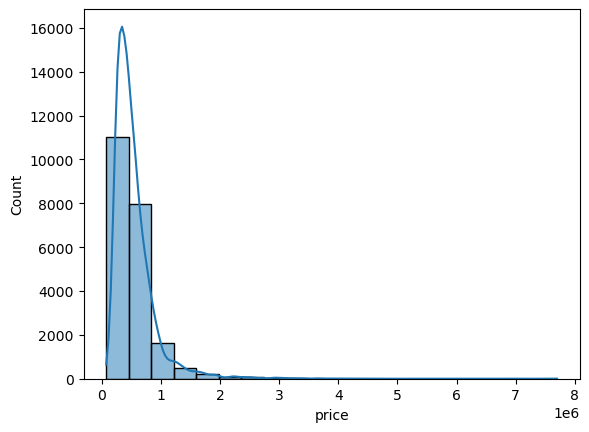

In [13]:
# Create a histogram for extreme values for Price
hist_price = sns.histplot(df_haus['price'], bins = 20, kde = True)


### Exploring Relationships

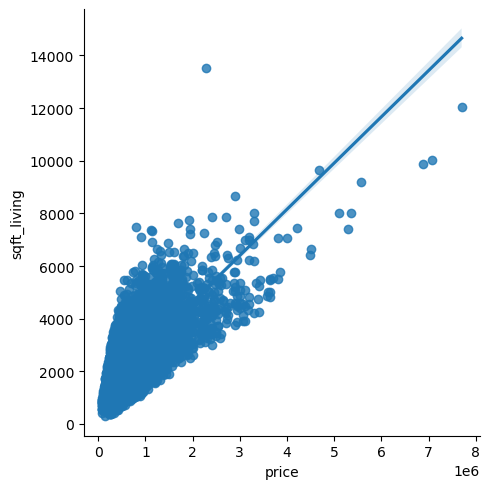

In [14]:
# Create scatterplot for price and sqft_living
scatter_us_op = sns.lmplot(data=df_haus, x="price", y="sqft_living")


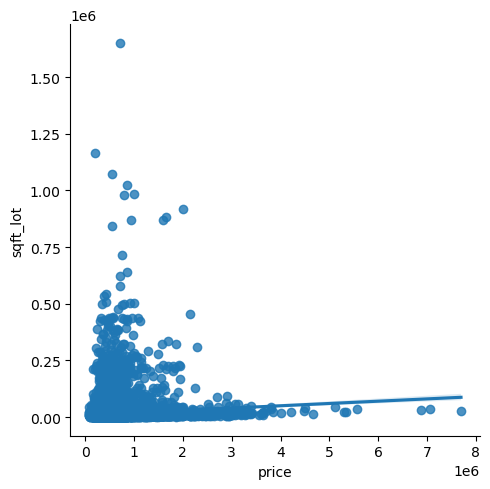

In [15]:
# Create scatterplot for price and sqft_lot
scatter_us_op = sns.lmplot(data=df_haus, x="price", y="sqft_lot")


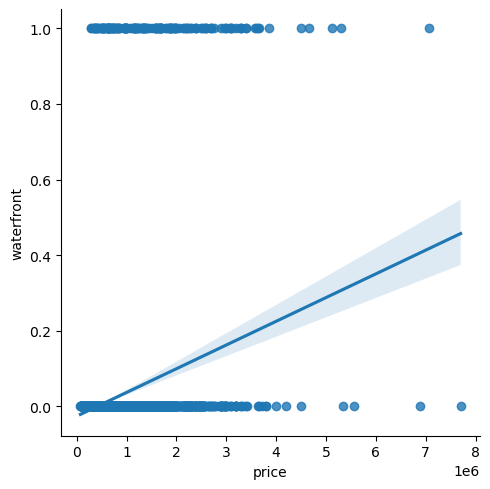

In [16]:
# Create scatterplot for price and waterfront
scatter_us_op = sns.lmplot(data=df_haus, x="price", y="waterfront")


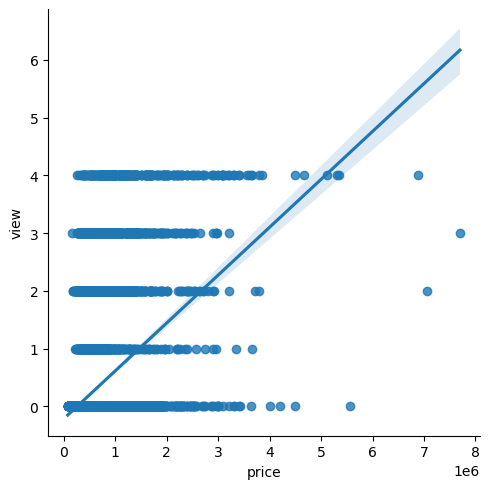

In [17]:
# Create scatterplot for price and view
scatter_us_op = sns.lmplot(data=df_haus, x="price", y="view")


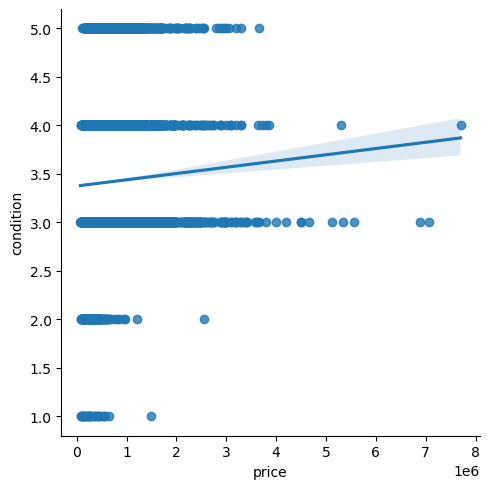

In [18]:
# Create scatterplot for price and condition
scatter_us_op = sns.lmplot(data=df_haus, x="price", y="condition")


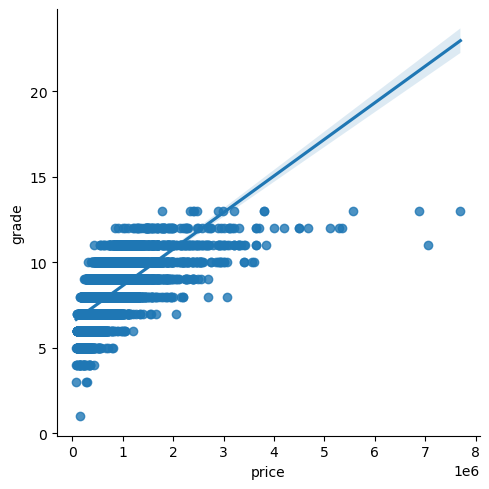

In [19]:
# Create scatterplot for price and grade
scatter_us_op = sns.lmplot(data=df_haus, x="price", y="grade")


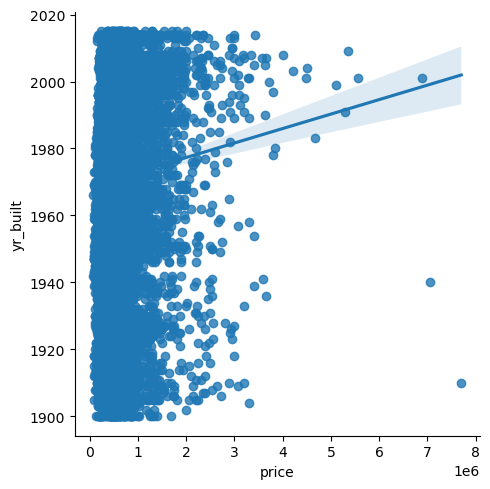

In [20]:
# Create scatterplot for price and yr_built
scatter_us_op = sns.lmplot(data=df_haus, x="price", y="yr_built")


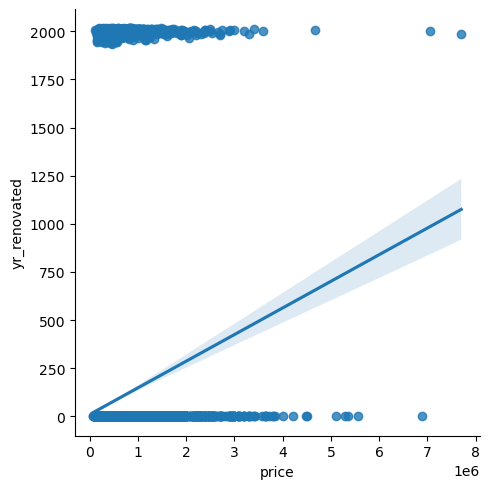

In [21]:
# Create scatterplot for price and yr_renovated
scatter_us_op = sns.lmplot(data=df_haus, x="price", y="yr_renovated")


## 5. Hypothesis

- The average price of houses with a waterfront are higher than the price of houses without a waterfront.

- The average price of houses with a larger living space are higher than the price of houses with a smaller living space.

- The average price of houses with a higher grade are higher than the price of houses with a lower grade.

- The average price of houses with a younger age are higher than the price of houses with a older age.

## 6. Reshaping The Variables into NumPy arrays

### Testing 'price' and 'sqft_living'

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_haus['price'].values.reshape(-1,1)
y = df_haus['sqft_living'].values.reshape(-1,1)


In [23]:
X


array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [24]:
y

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

## 7. Spliting the Data into Traning Set & Test Set

In [25]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


## 8. Run a Linear Regression on the Data

In [26]:
# Create a linear regression object
# that will be fit onto the training set.
regression = LinearRegression()  


### Fit the model that created to the training set

In [29]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)


LinearRegression()

### Create a Prediction for y on the Test Set (price & sqft_living)

In [30]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)


In [31]:
# Create objects that contain the model summary statistics.

# This is the mean squared error (MSE)
rmse = mean_squared_error(y_test, y_predicted) 

# This is the R2 score. 
r2 = r2_score(y_test, y_predicted) 


In [32]:
# Print the model summary statistics.
# This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[0.0017768]]
Mean squared error:  419493.85103103006
R2 score:  0.4885104293703798


## 9. Creating a Plot (Test Set)

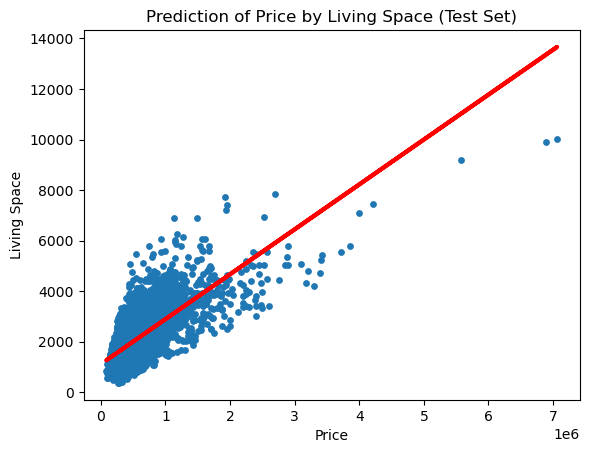

In [33]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, s = 15)
plot_test.plot(X_test, y_predicted,color='red', linewidth =3)
plot_test.title('Prediction of Price by Living Space (Test Set)')
plot_test.xlabel('Price')
plot_test.ylabel('Living Space')
plot_test.show()


In [34]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)


,Actual,Predicted
0,1430,1645.639743
1,4670,3921.717318
2,1440,2116.668755
3,1130,2239.978501
4,3180,2503.832927
5,1650,1979.677669
6,1720,1722.042034
7,2538,1714.234786
8,2460,1873.069820
9,4460,1988.561657


### Create a Prediction for y on the Train Set

In [35]:
# Predict x_train.
y_predicted_train = regression.predict(X_train)


In [36]:
# Create objects that contain the model summary statistics.

# This is the mean squared error (MSE)
rmse = mean_squared_error(y_train, y_predicted_train)

# This is the R2 score. 
r2 = r2_score(y_train, y_predicted_train)


In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[0.0017768]]
Mean squared error:  431413.89233598957
R2 score:  0.49453356717789776


## 9. Creating a Plot (Train Set)

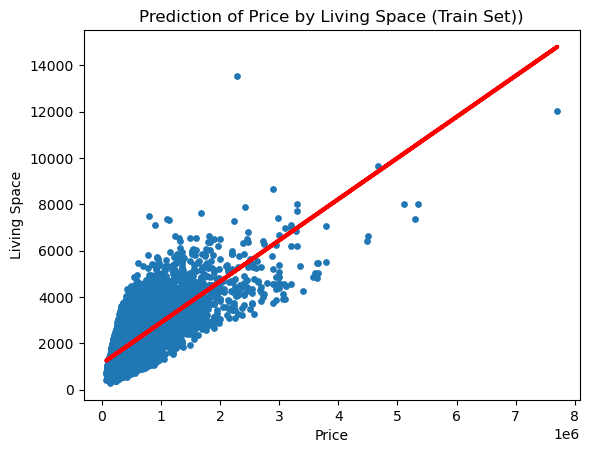

In [38]:
# Visualize the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Prediction of Price by Living Space (Train Set))')
plot_test.xlabel('Price')
plot_test.ylabel('Living Space')
plot_test.show()


In [39]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(30)


,Actual,Predicted
0,1390,1828.649883
1,1450,1881.953808
2,2860,2397.225078
3,1050,1815.323902
4,1240,2015.213619
5,1860,2024.097606
6,2070,2393.671483
7,2710,2068.517544
8,2030,2121.821468
9,1000,1828.649883


## 10. Interpretation
- The Test Set and the Training Set both exhibit the same slope, indicating a positive relationship between price and living space size, with a coefficient of 0.0017768.
- The Training Set has a higher mean squared error of 431,413.90, compared to the Test Set, which shows an error of 419,493.85.
- In the Test Set, the R2 value is 49%, while in the Training Set, it is 50%, signifying that 49% and 50% of the variance in living space size can be explained by the price, respectively.

## 11. Model Performance Statistics
#### Test Set (price & sqft_living)
- Slope: [[0.0017768]]
- Mean squared error:  419493.85103103006
- R2 score:  0.4885104293703798

#### Train Set (price & sqft_living)
- Slope: [[0.0017768]]
- Mean squared error:  431413.89233598957
- R2 score:  0.49453356717789776


## 12. Predicted vs Actual
#### Test Set (price & sqft_living)
---- Acual--- Predicted

0. 1,430	--- 1,645.64
1. 4,670	--- 3,921.72
2. 1,440	--- 2,116.67
3. 1,130	--- 2,239.98
4. 3,180	--- 2,503.83
5. 1,650	--- 1,979.68
6. 1,720	--- 1,722.04
7. 2,538	--- 1,714.23
8. 2,460	--- 1,873.07
9. 4,460	--- 1,988.56

#### Train Set (price & sqft_living)
---- Acual--- Predicted

0. 1,390	--- 1,828.65
1. 1,450	--- 1,881.95
2. 2,860	--- 2,397.23
3. 1,050	--- 1,815.32
4. 1,240	--- 2,015.21
5. 1,860	--- 2,024.10
6. 2,070	--- 2,393.67
7. 2,710	--- 2,068.52
8. 2,030	--- 2,121.82
9. 1,000	--- 1,828.65


## 13. Reflections
- The regression model performs reasonably well in predicting actual values, but further analysis and fine-tuning may be required to improve model performance.
- The size of the living space effects the house price.

## 6. Reshaping The Variables into NumPy arrays

### Testing 'price' and 'sqft_lot'

In [40]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_haus['price'].values.reshape(-1,1)
y = df_haus['sqft_lot'].values.reshape(-1,1)


In [41]:
X

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [42]:
y

array([[ 5650],
       [ 7242],
       [10000],
       ...,
       [ 1350],
       [ 2388],
       [ 1076]])

## 7. Spliting the Data into Traning Set & Test Set

In [43]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


## 8. Run a Linear Regression on the Data

In [44]:
# Create a regression object
# that will be fit onto the training set.
regression = LinearRegression()


### Fit the model that created to the training set

In [45]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)


LinearRegression()

### Create a Prediction for y on the Test Set (price & sqft_lot)

In [46]:
# Predicted the values of y using X.
y_predicted = regression.predict(X_test)


In [47]:
# Create objects that contain the model summary statistics.

# This is the mean squared error
rmse = mean_squared_error(y_test, y_predicted) 

# This is the R2 score. 
r2 = r2_score(y_test, y_predicted) 


In [48]:
# Print the model summary statistics. 
# This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[0.01092462]]
Mean squared error:  1558736488.430877
R2 score:  0.005306138190306675


## 9. Creating a Plot (Test Set)

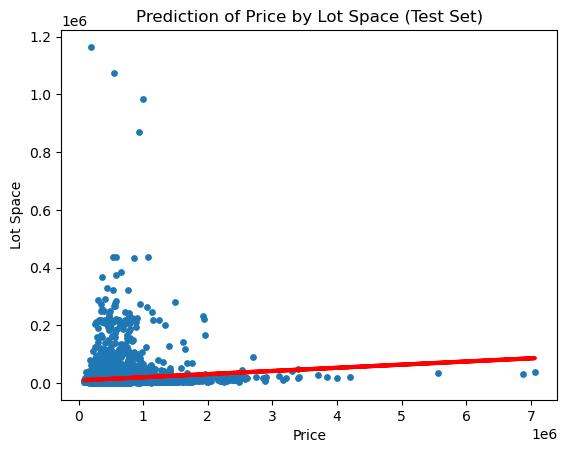

In [49]:
# Created a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, s = 15)
plot_test.plot(X_test, y_predicted,color='red', linewidth =3)
plot_test.title('Prediction of Price by Lot Space (Test Set)')
plot_test.xlabel('Price')
plot_test.ylabel('Lot Space')
plot_test.show()


In [50]:
# Created a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)


,Actual,Predicted
0,1650,12556.268415
1,51836,26550.712549
2,3700,15452.386401
3,2640,16210.555349
4,9603,17832.862105
5,3436,14610.097843
6,28000,13026.027273
7,4600,12978.024473
8,5440,13954.620366
9,2975,14664.720966


### Create a Prediction for y on the Train Set

In [51]:
# Predict X_train!
y_predicted_train = regression.predict(X_train) 


In [52]:
# Create objects that contain the model summary statistics.

# This is the mean squared error
rmse = mean_squared_error(y_train, y_predicted_train)

# This is the R2 score. 
r2 = r2_score(y_train, y_predicted_train)


In [53]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[0.01092462]]
Mean squared error:  1763238437.8286266
R2 score:  0.0089683233554686


## 9. Creating a Plot (Train Set)

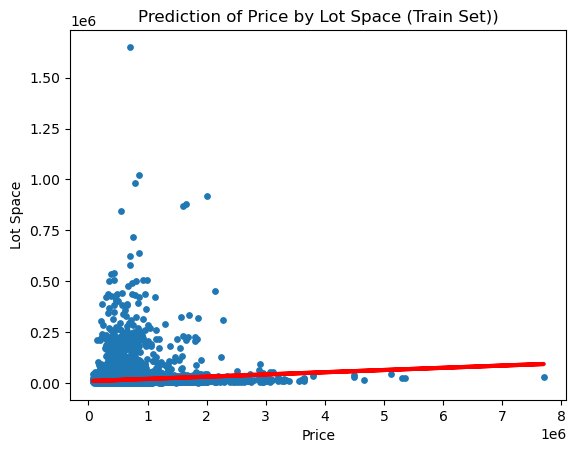

In [54]:
# Visualize the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Prediction of Price by Lot Space (Train Set))')
plot_test.xlabel('Price')
plot_test.ylabel('Lot Space')
plot_test.show()


In [55]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(30)


,Actual,Predicted
0,7200,13681.504750
1,7316,14009.243489
2,5379,17177.384628
3,4125,13599.570066
4,57000,14828.590335
5,5100,14883.213458
6,7200,17155.535378
7,12138,15156.329074
8,7350,15484.067812
9,7800,13681.504750


## 10. Interpretation
- The Test Set and the Training Set both exhibit the same slope, indicating a positive relationship between price and lot space size, with a coefficient of 0.01092462.
- The Training Set has a higher mean squared error of 1,763,238,437.83, compared to the Test Set, which shows an error of 1,558,736,488.43.
- In the Test Set, the R2 value is 0.5%, while in the Training Set, it is 0.9%, signifying that 0.5% and 0.9% of the variance in lot space size can be explained by the price, respectively.

## 11. Model Performance Statistics
#### Test Set (price & sqft_lot)
- Slope: [[0.01092462]]
- Mean squared error:  1558736488.430877
- R2 score:  0.005306138190306675

#### Train Set (price & sqft_lot)
- Slope: [[0.01092462]]
- Mean squared error:  1763238437.8286266
- R2 score:  0.0089683233554686


## 12. Predicted vs Actual
#### Test Set (price & sqft_lot)
---- Acual--- Predicted

0.  1,650 --- 12,556.27
1. 51,836 --- 26,550.71
2.  3,700 --- 15,452.39
3.  2,640 --- 16,210.56
4.  9,603 --- 17,832.86
5.  3,436 --- 14,610.10
6. 28,000 --- 13,026.03
7.  4,600 --- 12,978.02
8.  5,440 --- 13,954.62
9.  2,975 --- 14,664.72

#### Train Set (price & sqft_lot)
---- Acual--- Predicted

0. 7,200 --- 13,681.50
1. 7,316 --- 14,009.24
2. 5,379 --- 17,177.38
3. 4,125 --- 13,599.57
4. 57,000 --- 14,828.59
5. 5,100 --- 14,883.21
6. 7,200 --- 17,155.54
7. 12,138 --- 15,156.33
8. 7,350 --- 15,484.07
9. 7,800 --- 13,681.50

## 13. Reflections
- The regression model doesn't performs well in predicting actual values.
- The size of the lot space effects the house price very small.